# Generate Dummy Data for Plots

In [40]:
import pandas as pd
import numpy as np

# | numerical index
# numerical columns
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
# categorical column
df['CAT1'] = np.random.choice(['C1','C2','C3'], size=len(df))
df['CAT2'] = np.random.choice(['C1','C2','C3'], size=len(df))
# df['CAT'] = pd.util.testing.rands_array(10, len(df))


# | datetime index
df_time = df.copy()
nr_days = len(df)
dates = pd.date_range(start='2018-04-24', freq='D', periods=nr_days)
df_time = df_time.set_index(dates)


df_time.head()

,A,B,C,D,CAT1,CAT2
2018-04-24,-2.577915,-0.696075,1.384218,2.669485,C1,C2
2018-04-25,-0.012183,-1.947572,-1.534907,-0.086171,C2,C1
2018-04-26,-1.506394,-1.194563,0.404030,0.237952,C1,C1
2018-04-27,-1.311950,-0.285033,-0.797986,-1.023510,C3,C3
2018-04-28,0.064998,0.039249,0.145516,1.122111,C3,C3


# Line Plots

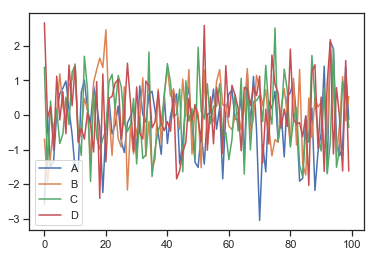

In [41]:
df.plot() # ignores categorical columns automatically

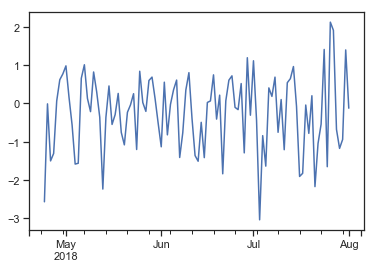

In [42]:
df_time['A'].plot()

## Configuring plots

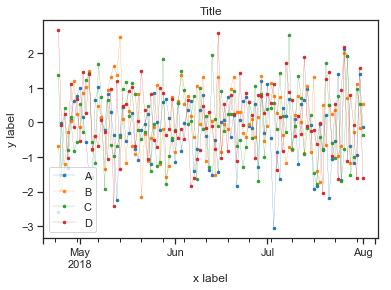

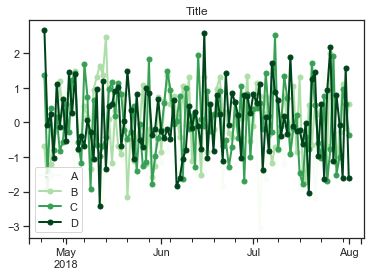

In [43]:
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# df.plot() function returns a matplotlib.axes.AxesSubplot object
ax = df_time.plot(lw=0.2, color=color_map, marker='.', markersize=5, title='Title')
ax.set_xlabel("x label")
ax.set_ylabel("y label")

df_time.plot(lw=2, colormap='Greens', marker='.', markersize=10, title='Title')


# lists of colormaps (note: color vs colormap parameters): 
# https://github.com/vega/vega/wiki/Scales#scale-range-literals
# https://matplotlib.org/examples/color/colormaps_reference.html

# Area Plots

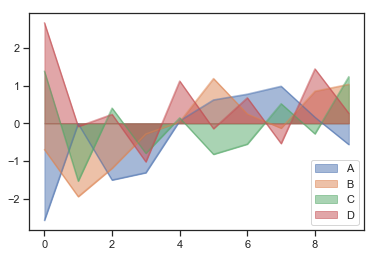

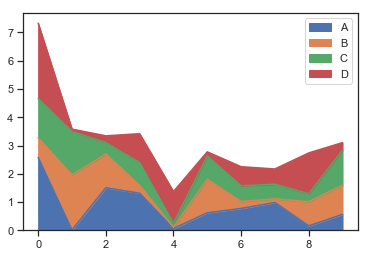

In [44]:
df.iloc[:10].plot.area(stacked=False)

df[list('ABCD')].abs().iloc[:10].plot.area(stacked=True)  # if stacked=True: no negative values allowed

# Scatter Plots

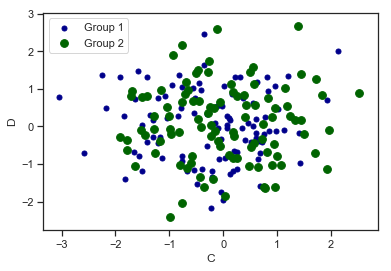

In [45]:
ax = df.plot.scatter(x='A', y='B', color='DarkBlue', label='Group 1', s=25);
df.plot.scatter(x='C', y='D', color='DarkGreen', label='Group 2', ax=ax, s=60);

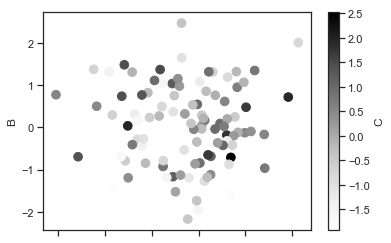

In [46]:
# s controls dot size
# c may be given as the name of a column to provide colors for each point
df.plot.scatter(x='A', y='B', c='C', s=75);

# Bar Plots

### Frequency Plots (for categorical columns)

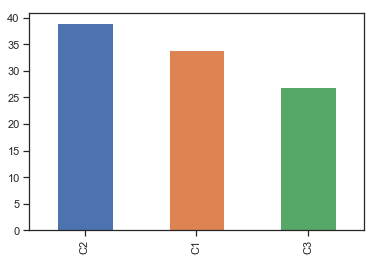

In [47]:
# one category
df['CAT1'].value_counts().plot.bar()

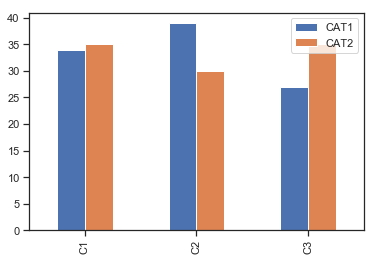

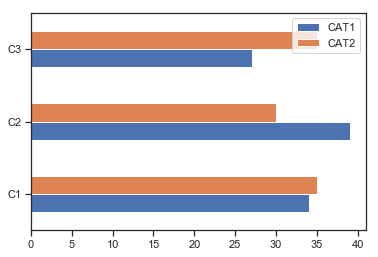

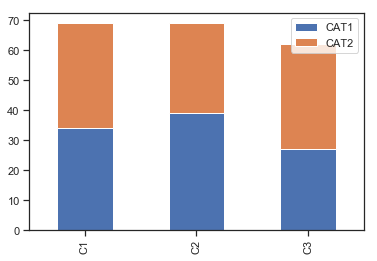

In [48]:
# two or more categories
df_new = df[['CAT1', 'CAT2']].apply(lambda x: x.value_counts())

df_new.plot.bar(stacked=False)
df_new.plot.barh(stacked=False);
df_new.plot.bar(stacked=True)

# Histogram

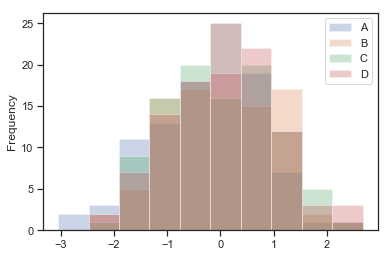

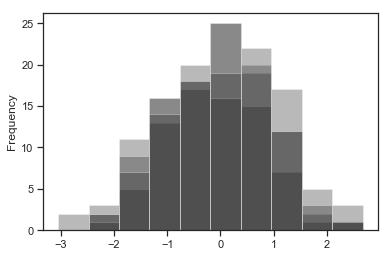

In [49]:
# alpha to configure transparency
df.plot.hist(alpha=0.3)
df.plot.hist(alpha=0.3, color='k', legend=None)

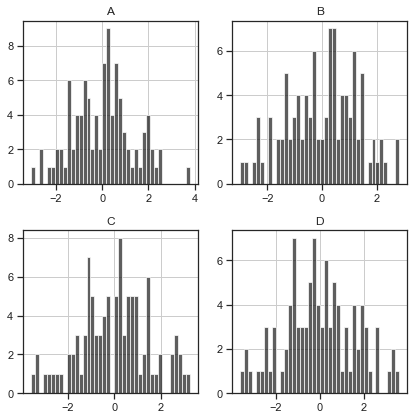

In [50]:
df[list('ABCD')].diff().hist(color='k', alpha=0.7, bins=40, figsize=(6, 6)) # note: diff() might be interesting for time-series
plt.tight_layout() # more space between plots (if not titles and labels overlap)

# Hexagonal Bin Plot

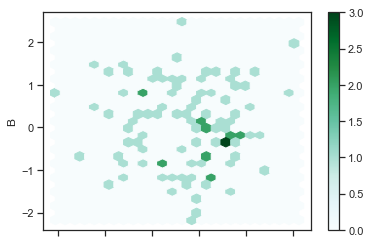

In [51]:
df.plot.hexbin(x='A', y='B', gridsize=25)

# Box Plots 

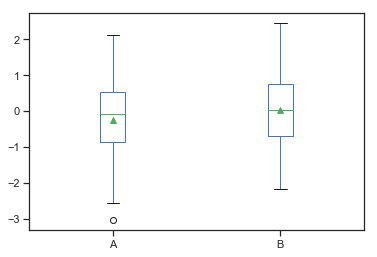

In [52]:
df[['A', 'B']].plot.box(showmeans=True)

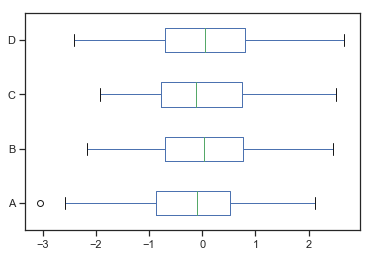

In [53]:
df.plot.box(vert=False)

# Subplots

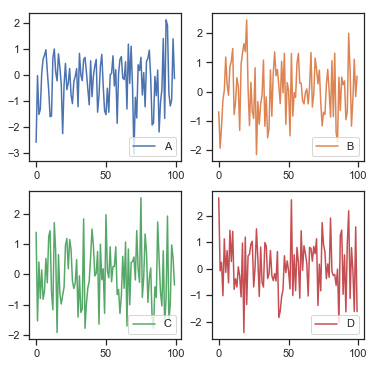

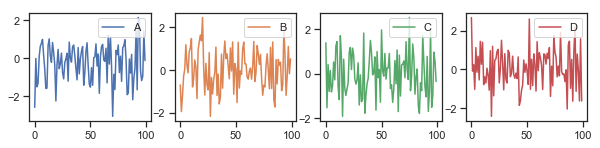

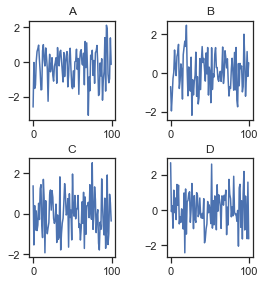

In [54]:
# A 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax_targets = [item for sublist in axes for item in sublist] # flatten

axs = df.plot(subplots=True, ax=ax_targets, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=4) for ax in plt.gcf().axes]


# B
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2))
axs = df.plot(subplots=True, ax=axes, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=1) for ax in plt.gcf().axes]

# C
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,4))
plt.tight_layout() # more space between plots (if not titles and labels overlap)
ax_targets = [item for sublist in axes for item in sublist] # flatten

for ax, col_name in zip(ax_targets, df):
    df[col_name].plot(ax=ax)
    ax.set_title(col_name);


# Using Matplotlib

In some situations it may still be preferable or necessary to prepare plots directly with matplotlib, for instance when a certain type of plot or customization is not (yet) supported by pandas. Series and DataFrame objects behave like arrays and can therefore be passed directly to matplotlib functions without explicit casts.

### Subplots

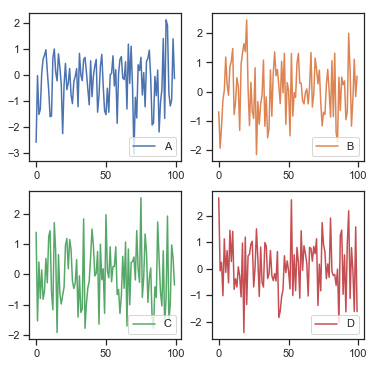

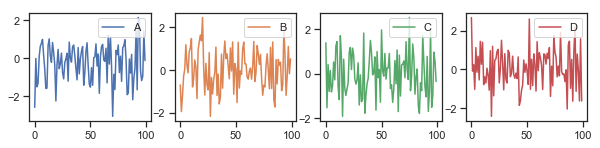

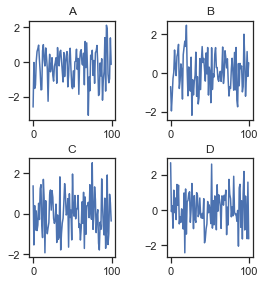

In [55]:
# A 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax_targets = [item for sublist in axes for item in sublist] # flatten

axs = df.plot(subplots=True, ax=ax_targets, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=4) for ax in plt.gcf().axes]


# B
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2))
axs = df.plot(subplots=True, ax=axes, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=1) for ax in plt.gcf().axes]

# C
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,4))
plt.tight_layout() # more space between plots (if not titles and labels overlap)
ax_targets = [item for sublist in axes for item in sublist] # flatten

for ax, col_name in zip(ax_targets, df):
    df[col_name].plot(ax=ax)
    ax.set_title(col_name);

### Error Band

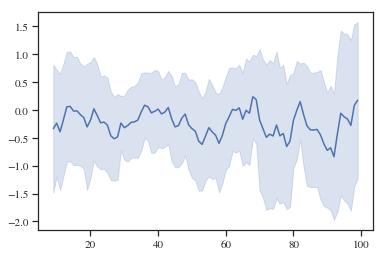

In [56]:
import matplotlib.pyplot as plt
# nice fonts
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# sns.set(style="darkgrid")

col = df['A']
means = col.rolling(10).mean()
stds = col.rolling(10).std()

plt.plot(means.index, means)
plt.fill_between(stds.index, means - 1 * stds, means + 1 * stds, color='b', alpha=0.2)

# Using Seaborn

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


dict_list = [
    {"seed": 1, "p_loss": 0.1, "precision": 0.98, "recall": 0.9},
    {"seed": 2, "p_loss": 0.1, "precision": 0.96, "recall": 0.99},
    {"seed": 1, "p_loss": 0.2, "precision": 0.95, "recall": 0.98},
    {"seed": 2, "p_loss": 0.2, "precision": 0.90, "recall": 0.80},
    {"seed": 1, "p_loss": 0.3, "precision": 0.90, "recall": 0.78},
    {"seed": 2, "p_loss": 0.3, "precision": 0.85, "recall": 0.75}
]

df2 = pd.DataFrame(dict_list)

## Lineplots

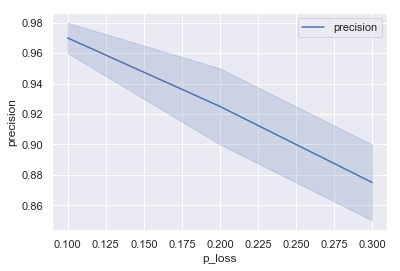

In [57]:
estimator = np.median

# | standard seaborn plot
sns.set(style="darkgrid")

sns.lineplot(x="p_loss", y="precision", data=df2, estimator=estimator, label="precision")
plt.show()

### Custom plot 

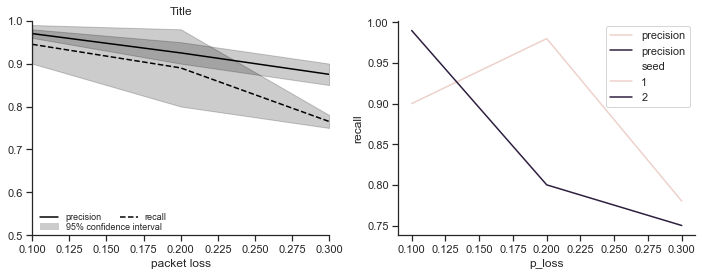

In [59]:
# | fonts
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# | There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks
# | see https://python-graph-gallery.com/104-seaborn-themes/
sns.set(style="ticks") 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# | line plot with error band
sns.lineplot(x="p_loss", y="precision", legend=False, color="black", data=df2, estimator=estimator, label="precision", ax=axes[0])
ax = sns.lineplot(x="p_loss", y="recall", legend=False, color="black", data=df2, estimator=estimator, label="recall", ax=axes[0])
ax.lines[1].set_linestyle("--") 
# alternatively use style parameter to set linestyles automatically
# (needs a style column in df - not possible here, as precision and recall occur on the same row)

# | line plot with hue parameter, to draw multiple lines, instead of error band
sns.lineplot(x="p_loss", y="recall", legend='full', data=df2, estimator=estimator, label="precision", hue="seed", ax=axes[1])

# | Title & Labels
axes[0].set_title('Title')
axes[0].xaxis.set_label_text("packet loss")
axes[0].yaxis.set_label_text("")

# | axes
axes[0].set_xlim([0.1,0.3])
# axes[1].set_xticks(np.linspace(0,0.9,10))
axes[0].set_ylim([0.5, 1.0])

# | legend
# ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, borderaxespad=0, frameon=False)
color = "#CCCCCC"
conf_patch = mpatches.Patch(color=color, label='95% confidence interval')
l1 = axes[0].legend(loc='lower left', handles=[conf_patch], bbox_to_anchor= (0.0, -0.02), frameon=False, fontsize=9)
axes[0].legend(loc='lower left', bbox_to_anchor= (0.0, 0.025), ncol=2, frameon=False, fontsize=9)
axes[0].add_artist(l1)

# | remove plot border
sns.despine()

# | tight layout for more spacing between subplots
plt.tight_layout()


plt.show()

## Violin Plots

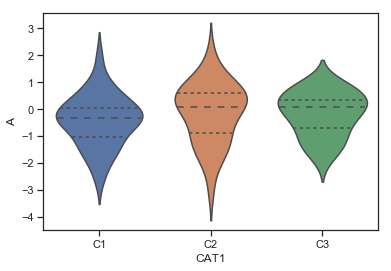

In [75]:
sns.violinplot(x='CAT1', y='A', split=True, inner="quart", data=df)
# sns.despine()

## Joint Plots

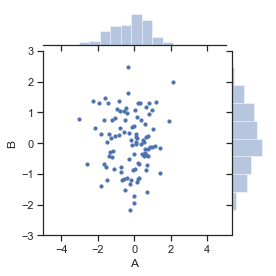

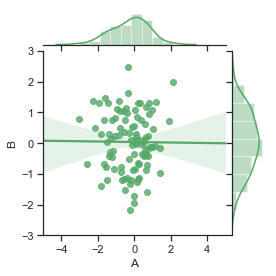

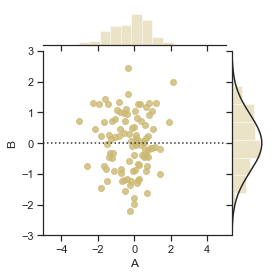

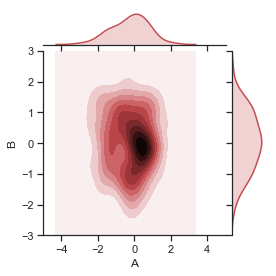

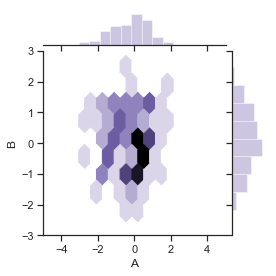

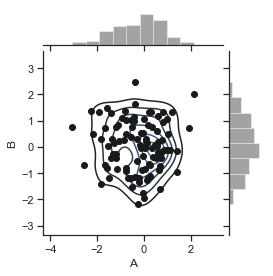

In [141]:
sns.set(style="ticks") 

# | kind: “scatter” | “reg” | “resid” | “kde” | “hex” 
# | s: dot size
# | dropna: f True, remove observations that are missing from x and y.

sns.jointplot("A", "B", data=df, xlim=(-5, 5), ylim=(-3, 3), color="b", height=4, s=10, kind="scatter")

sns.jointplot("A", "B", data=df, xlim=(-5, 5), ylim=(-3, 3), color="g", height=4, kind="reg")

sns.jointplot("A", "B", data=df, xlim=(-5, 5), ylim=(-3, 3), color="y", height=4, kind="resid")

sns.jointplot("A", "B", data=df, xlim=(-5, 5), ylim=(-3, 3), color="r", height=4, kind="kde")

sns.jointplot("A", "B", data=df, xlim=(-5, 5), ylim=(-3, 3), color="m", height=4, kind="hex")

sns.jointplot("A", "B", data=df, color="k", height=4).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

## Pair plots

Draw scatterplots for joint relationships and histograms for univariate distributions

In [152]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df_iris = sns.load_dataset("iris")

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


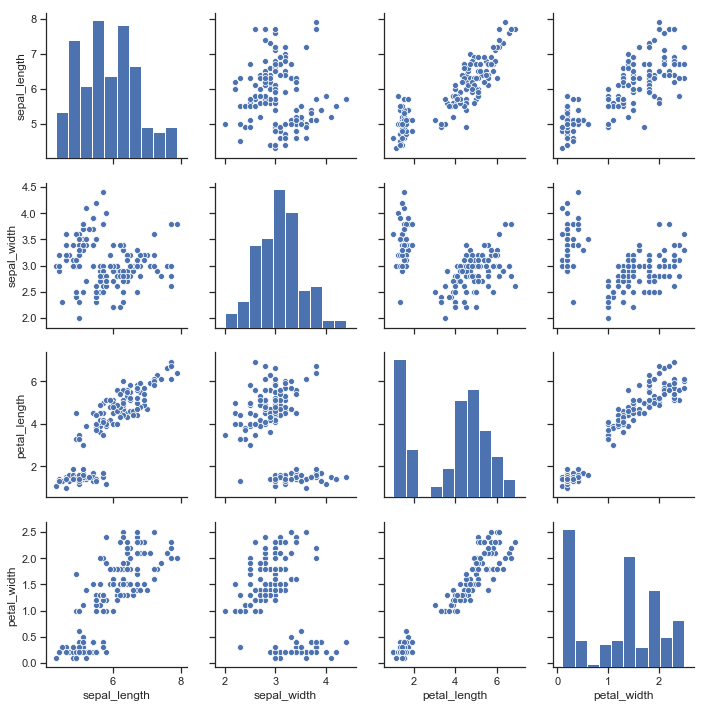

In [149]:
sns.pairplot(df_iris)

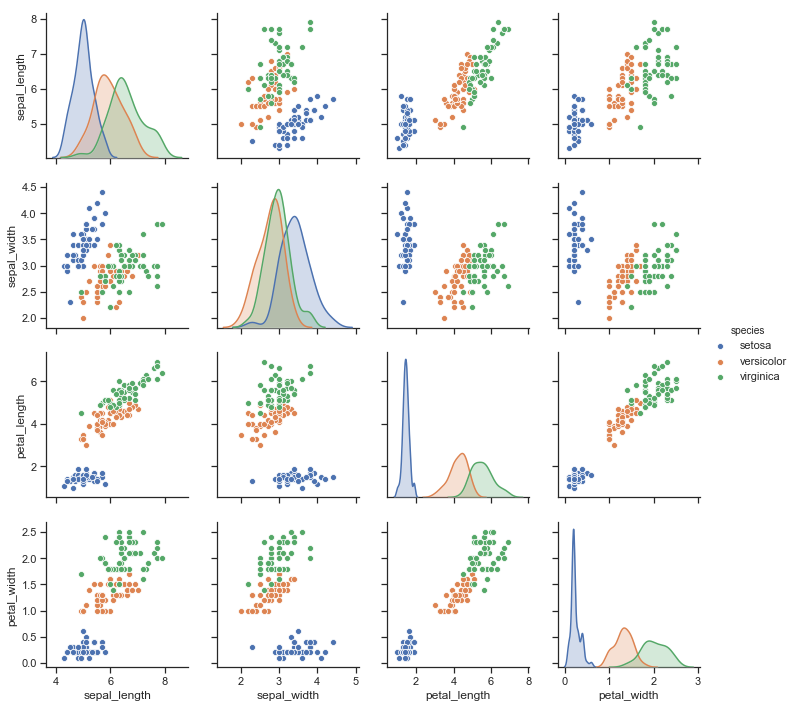

In [153]:
# | Show different levels of a categorical variable by the color of plot elements:
sns.pairplot(iris, hue="species")

## Heatmap

### Heatmap on Correlation Matrix

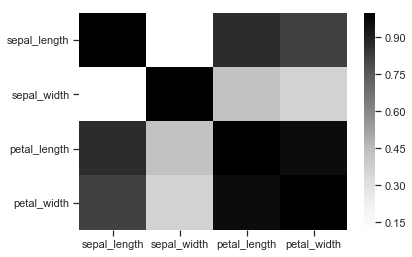

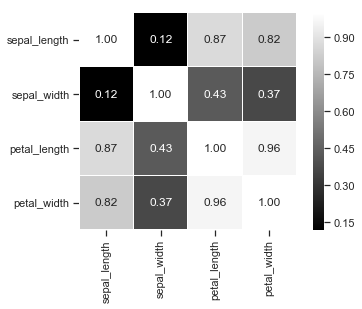

In [219]:
df_corrmatrix = df_iris.corr().abs()

# | standard heatmap
sns.heatmap(df_corrmatrix, cmap="Greys")

# | custom heatmap
fig, (ax) = plt.subplots(1, 1)

hm = sns.heatmap(df_corrmatrix,
                 cmap="gray", # Color Map.
                 square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 13}, # fontsize for values in heatmap
                 linewidths=.05)

# ax.set_title('Title', fontsize=14, fontweight='bold')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


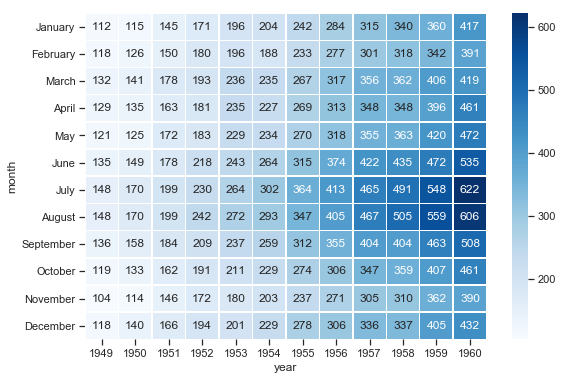

In [250]:
# Load the example flights dataset and conver to long-form
df_flights_long = sns.load_dataset("flights")
df_flights = flights_long.pivot(index="month", columns="year", values="passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_flights, annot=True, fmt="d", linewidths=.5, cmap="Blues", ax=ax)
df_flights